<hr>
<font size = 6>MS0240: Mathematics for AI CA1 Assignment</font><br>
<font size = 5>Question 2 (using cars_0.xlsx)</font>
<hr>
<font size = 4>Name: Lee Hong Yi <br>
Admin No: 2223010 <br>
Class: DAAA/FT/2A/05 </font>
<hr>

Importing packages and datafiles

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA

q2_data = pd.read_excel("./dataset_0/dataset_0/cars_0.xlsx")

q2_data.head()

,Brand,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,audi,sedan,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,audi,sedan,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


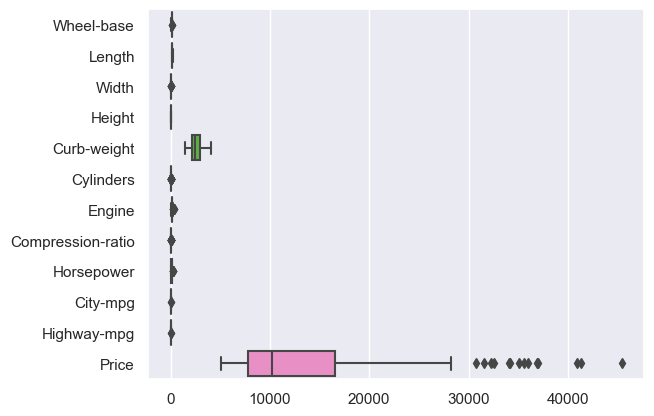

['Brand',
 'Type',
 'Wheel-base',
 'Length',
 'Width',
 'Height',
 'Curb-weight',
 'Cylinders',
 'Engine',
 'Compression-ratio',
 'Horsepower',
 'City-mpg',
 'Highway-mpg',
 'Price']

In [38]:
sns.boxplot(q2_data, orient = 'h')
plt.show()
q2_columns = q2_data.columns
display(list(q2_columns))

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,-0.551983,-0.143781,-0.275345,-0.694223,-0.006891,-0.134034,0.016356,-0.096706,0.067086,-0.224639,-0.184890,0.010078
1,-0.547213,-0.142539,-0.272966,-0.688225,-0.006832,-0.132876,0.016215,-0.095870,0.066506,-0.222698,-0.183293,0.131549
2,-0.261338,-0.089311,-0.066006,-0.222276,0.183396,0.566962,0.211679,-0.107230,0.488278,-0.362971,-0.258386,0.147137
3,0.039068,0.089341,0.114631,0.087028,0.240256,0.272989,0.092558,-0.257058,0.147330,-0.548029,-0.615855,0.248125
4,0.091610,0.151635,0.120650,-0.197533,-0.061611,0.356753,0.120959,-0.259410,0.110454,-0.619069,-0.531726,0.154490


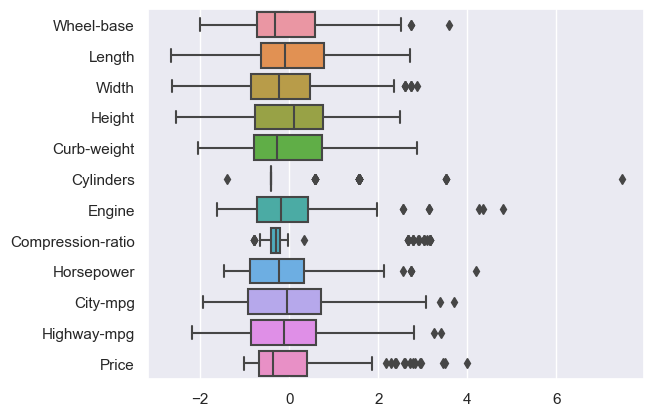

In [39]:
scaler = StandardScaler()
scaler.fit(q2_data.iloc[:,2:])
q2_data.iloc[:,2:] = scaler.transform(q2_data.iloc[:,2:])
q2_reduced_data = pd.DataFrame(normalize(q2_data.iloc[:,2:]), columns = list(q2_columns[2:]))
display(q2_reduced_data.head())
sns.boxplot(q2_data, orient = 'h')
plt.show()

In [40]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [54]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=15, height=15, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.03

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.02, head_length=0.02, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i+2], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

In [42]:
#This function generates the scoreplot

def scoreplot_label(data, scores, pca, width=10, height=10, margin=0.5, categorise=None):
    fig, ax = plt.subplots(figsize=(width, height))

    x_min = min(scores.iloc[:, 0].min(), 0)-margin
    x_max = max(scores.iloc[:, 0].max(), 0)+margin
    y_min = min(scores.iloc[:,1].min(), 0)-margin
    y_max = max(scores.iloc[:,1].max(), 0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)

    if categorise is not None and isinstance(categorise, pd.Series):
        df = pd.concat([scores, categorise], axis=1)
        sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df[categorise.name])
        plt.legend(
            loc='upper center', 
            bbox_to_anchor=(0.5,-0.05), 
            fancybox=True, 
            ncol=5)
    else:
        return ax

In [43]:
#This function adds a new point to the graph

def AddPoint(plot, x, y, color):
    plot.scatter(x, y, c=color, marker = 'x', s = 1000)
    plot.show()

In [44]:
pca = PCA(n_components=8).fit(q2_data.iloc[:,2:])
pca_samples = pca.transform(q2_data.iloc[:,2:])

pca_results = pca_results(q2_data.iloc[:,2:], pca)
display(pca_results)


,Eigenvalue,Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.5290,0.6242,0.2778,0.3204,0.3221,0.0961,0.3500,0.2652,0.3319,0.0043,0.3089,-0.3122,-0.3220,0.3279
PC 2,2.0279,0.1681,-0.3805,-0.2489,-0.1770,-0.5366,-0.0948,0.2229,0.1269,-0.4888,0.2957,-0.2091,-0.1590,0.0618
PC 3,1.0976,0.0910,-0.1268,-0.1400,0.0485,-0.3564,0.0411,0.3935,0.2666,0.6045,0.0452,0.3235,0.2964,0.2176
PC 4,0.4377,0.0363,-0.0300,-0.1308,-0.2419,0.6130,-0.1480,0.5609,0.1544,-0.3139,-0.0436,0.1869,0.1713,0.1507
PC 5,0.3151,0.0261,-0.4431,-0.1376,-0.4070,0.3572,0.0875,-0.1815,-0.0734,0.4478,0.3037,-0.2770,-0.2311,0.1501
PC 6,0.1878,0.0156,0.0035,0.0343,-0.0878,-0.0403,0.0320,0.5053,-0.0469,0.2341,-0.2758,-0.2322,-0.3558,-0.6478
PC 7,0.1333,0.0111,-0.2729,-0.3451,0.6752,0.1304,-0.2427,0.1318,-0.3396,0.0517,-0.1850,-0.1333,-0.1754,0.2376
PC 8,0.1149,0.0095,-0.3365,0.2799,0.3511,0.1575,-0.0061,0.0576,-0.0776,-0.0390,0.5761,0.1468,0.2856,-0.4630


In [45]:
for i, row in pca_results.drop(columns=["Eigenvalue", "Explained Variance"]).iterrows():
    listing = []
    print(f"Equation for {i}:")
    for j in range(len(row)):
        listing.append(str(row[j]) + f"z{j+1}")
    print(" + ".join(listing))

Equation for PC 1:
0.2778z1 + 0.3204z2 + 0.3221z3 + 0.0961z4 + 0.35z5 + 0.2652z6 + 0.3319z7 + 0.0043z8 + 0.3089z9 + -0.3122z10 + -0.322z11 + 0.3279z12
Equation for PC 2:
-0.3805z1 + -0.2489z2 + -0.177z3 + -0.5366z4 + -0.0948z5 + 0.2229z6 + 0.1269z7 + -0.4888z8 + 0.2957z9 + -0.2091z10 + -0.159z11 + 0.0618z12
Equation for PC 3:
-0.1268z1 + -0.14z2 + 0.0485z3 + -0.3564z4 + 0.0411z5 + 0.3935z6 + 0.2666z7 + 0.6045z8 + 0.0452z9 + 0.3235z10 + 0.2964z11 + 0.2176z12
Equation for PC 4:
-0.03z1 + -0.1308z2 + -0.2419z3 + 0.613z4 + -0.148z5 + 0.5609z6 + 0.1544z7 + -0.3139z8 + -0.0436z9 + 0.1869z10 + 0.1713z11 + 0.1507z12
Equation for PC 5:
-0.4431z1 + -0.1376z2 + -0.407z3 + 0.3572z4 + 0.0875z5 + -0.1815z6 + -0.0734z7 + 0.4478z8 + 0.3037z9 + -0.277z10 + -0.2311z11 + 0.1501z12
Equation for PC 6:
0.0035z1 + 0.0343z2 + -0.0878z3 + -0.0403z4 + 0.032z5 + 0.5053z6 + -0.0469z7 + 0.2341z8 + -0.2758z9 + -0.2322z10 + -0.3558z11 + -0.6478z12
Equation for PC 7:
-0.2729z1 + -0.3451z2 + 0.6752z3 + 0.1304z4 + -0.2

<Figure size 640x480 with 0 Axes>

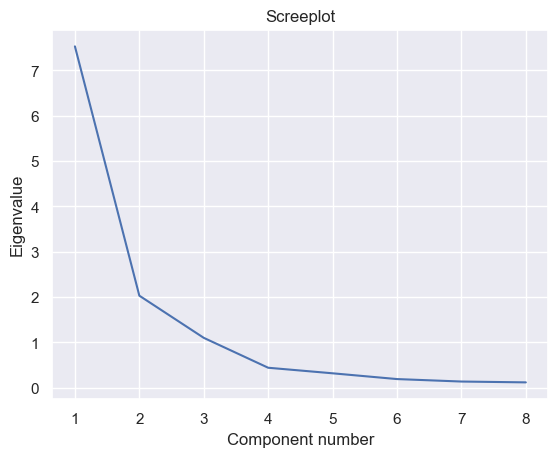

In [46]:
#Scree plot
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [47]:
pca_results = pca_results.iloc[:2]
display(pca_results)

,Eigenvalue,Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.5290,0.6242,0.2778,0.3204,0.3221,0.0961,0.3500,0.2652,0.3319,0.0043,0.3089,-0.3122,-0.322,0.3279
PC 2,2.0279,0.1681,-0.3805,-0.2489,-0.1770,-0.5366,-0.0948,0.2229,0.1269,-0.4888,0.2957,-0.2091,-0.159,0.0618


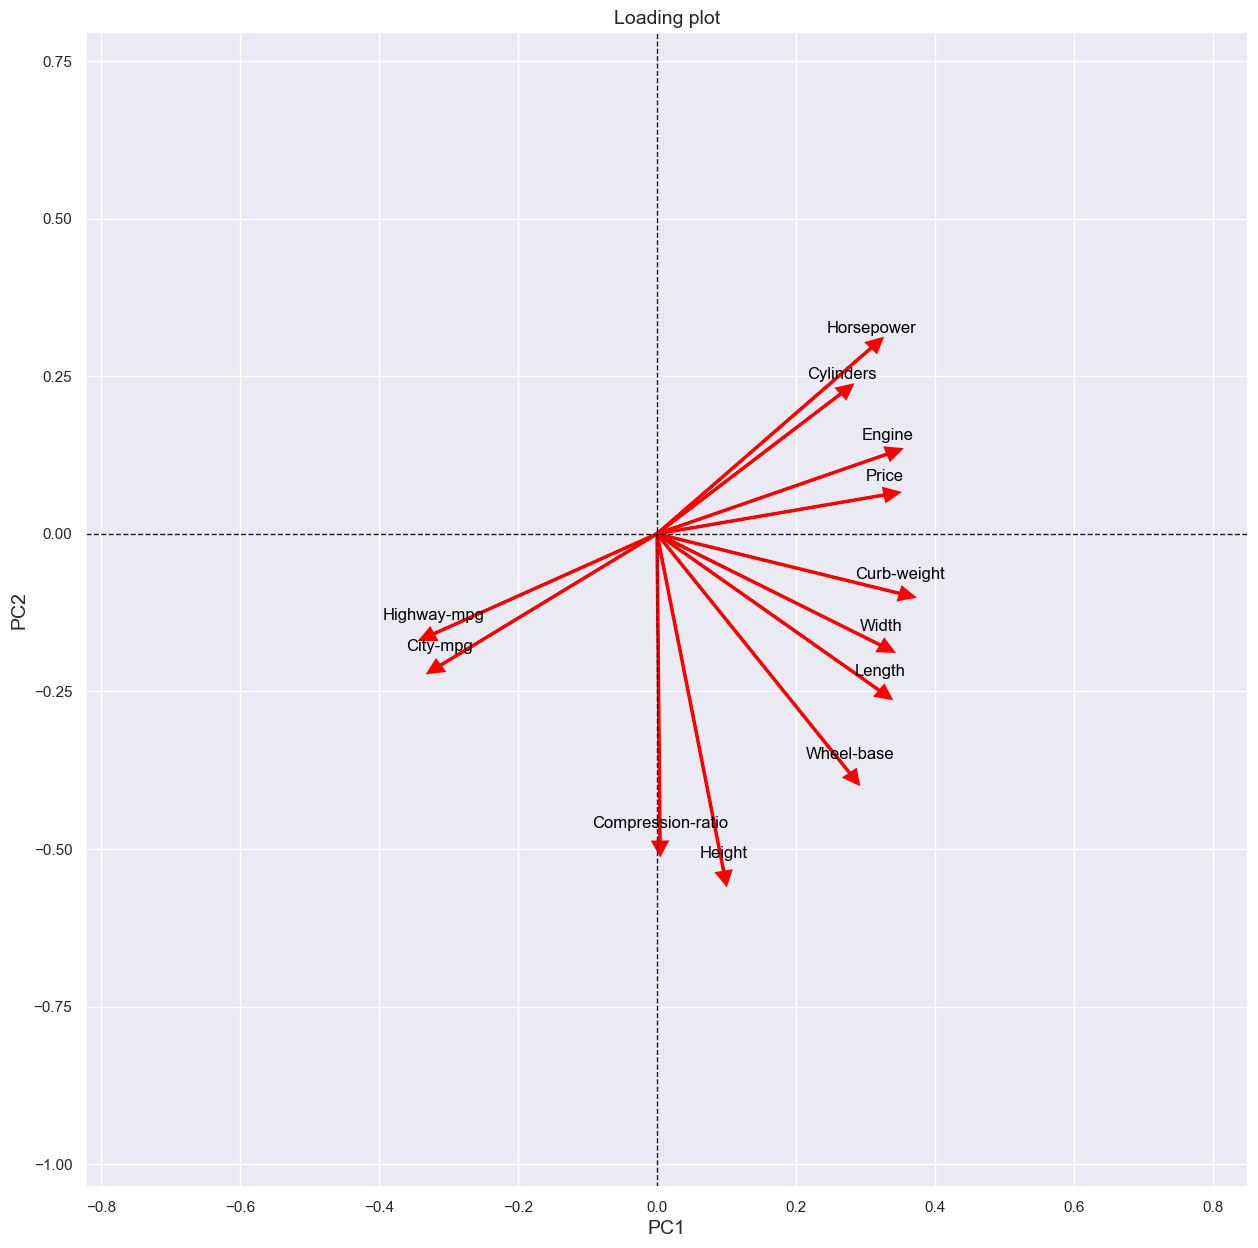

In [55]:
ax2 = loadingplot(q2_data, pca) 
plt.show()

In [49]:
#Obtain scores from original data that are not centred
scores_notcentred = np.dot(q2_data.iloc[:,2:], pca.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
scores_notcentred = scores_notcentred.iloc[:,:3]
display(scores_notcentred)

,PC1,PC2,PC3
0,-0.713926,2.391165,0.289194
1,-0.591317,2.414289,0.370558
2,1.474499,1.956636,0.561059
3,1.616762,0.722490,-0.749255
4,1.056737,0.799530,-0.423449
...,...,...,...
190,2.103761,-1.326778,-0.833766
191,2.955973,-0.661421,-1.166400
192,2.750589,-1.101192,-1.001834
193,3.755854,-0.243440,-0.273907


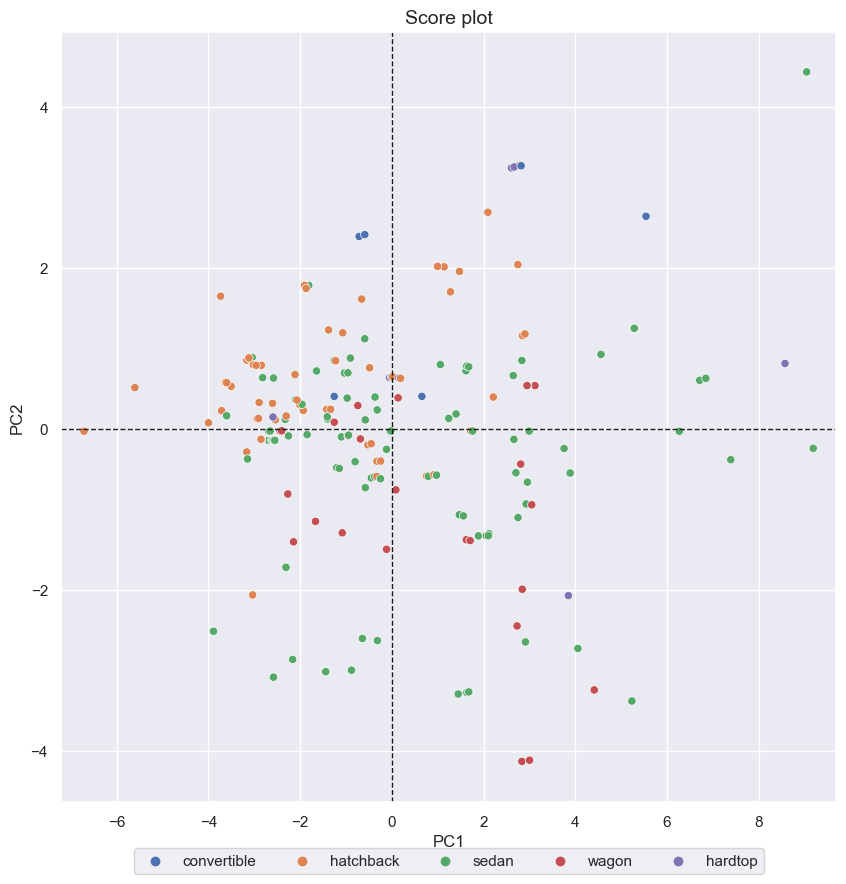

In [50]:
ax = scoreplot_label(q2_data, scores_notcentred[["PC1","PC2"]], pca = pca, categorise = q2_data['Type'])